# Construir um simples rede neural artificial com Keras

Objetivo:
Classificar numeros entre 0-1. Se o número analisado for menor ou igual a 0.5, receberá classe 0, senão, classe 1.

In [15]:
import numpy as np
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


# Criar um dataset generico com 10 mil amostras
data = np.random.random(10000)
data.shape = 10000, 1
print(data[:5])  # Cinco primeiras amostras

labels = np.array(data >= .5, dtype=int)
print(labels[:5])  #Cinco primeiras labels



[[0.13580229]
 [0.94011366]
 [0.17456894]
 [0.09524545]
 [0.24408189]]
[[0]
 [1]
 [0]
 [0]
 [0]]


# Construir o modelo da RNA simples

A classe de modelo **Sequential** permite especificar a arquitetura de um modelo como uma lista (ou: seqüência, daí o nome) de camadas. Especificamos duas camadas, ambas Densas, o que significa que cada neurônio da camada está conectado a todos os neurônios da camada acima.

A primeira camada (não de entrada), que consiste em 8 neurônios, especifica a forma das observações de entrada, que no nosso caso é apenas um único número (ou seja, uma matriz de forma (1, )). A palavra-chave de ativação especifica como os neurônios traduzem sua entrada em uma saída. Aqui usamos a função de unidade linear retificada ('relu'), que essencialmente significa que os neurônios não podem ter uma saída negativa.

A segunda camada, que consiste em dois neurônios, é nossa camada de saída. A função de ativação 'softmax' significa essencialmente que a saída do neurônio é comprimida na faixa de 0 a 1.

In [6]:
model = Sequential([
    Dense(units=8, input_shape=(1,), activation='relu'),
    Dense(units=2, activation='softmax'),
])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 16        
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


A palavra-chave do otimizador especifica o algoritmo que será usado para ajustar os pesos no modelo. Usaremos Adam, mas outros algoritmos também estão disponíveis, e a escolha de um algoritmo em detrimento de outro depende em grande parte de preferência e experiência.

A palavra-chave loss especifica a função de perda, que é o algoritmo que determina o quanto as previsões do modelo estão erradas. O objetivo do treinamento é reduzir a perda. Usaremos `sparse_categorical_crossentropy`, que assume que valores de rótulo de 0 significam que o primeiro neurônio na camada de saída deve ser o mais ativo, enquanto valores de rótulo de 1 significam que o segundo neurônio deve ser o mais ativo.

A palavra-chave de Accuracy especifica uma métrica que é impressa durante o treinamento para que você tenha uma ideia do desempenho do modelo. Isso é apenas para visualização e não afeta o processo de treinamento em si.

In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 16        
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


Nosso modelo possui 34 parâmetros, que correspondem a todos os pesos das conexões entre os neurônios, bem como o parâmetro de bias para cada neurônio (uma espécie de nível de atividade da linha de base que um neurônio possui na ausência de qualquer entrada).

A primeira camada consiste em oito neurônios, cada um com uma conexão com o neurônio de entrada mais uma polarização, então 8 × (1 + 1) = 16 parâmetros no total. A segunda camada consiste em dois neurônios, cada um com uma conexão com todos os oito neurônios da camada anterior mais uma polarização, então 2 × (8 + 1) = 18 parâmetros no total.

# Treinando o modelo

Para treinar o modelo, simplesmente chamamos a função fit(). Durante o treinamento, os 34 parâmetros do modelo são ajustados para minimizar a perda.

A palavra-chave epochs especifica com que frequência os dados de treinamento devem ser usados ​​para ajustar o modelo. No nosso caso, especificamos 10 épocas, o que é semelhante a chamar fit() 10 vezes seguidas com os mesmos dados e rótulos.

A palavra-chave verbose especifica quanta informação deve ser impressa durante o treinamento.

In [13]:
history = model.fit(x=data, y=labels, epochs=10, verbose=2, validation_split=.1, shuffle = True)

Epoch 1/10
282/282 - 0s - loss: 0.0273 - accuracy: 0.9978 - val_loss: 0.0258 - val_accuracy: 0.9990 - 455ms/epoch - 2ms/step
Epoch 2/10
282/282 - 0s - loss: 0.0267 - accuracy: 0.9977 - val_loss: 0.0249 - val_accuracy: 1.0000 - 394ms/epoch - 1ms/step
Epoch 3/10
282/282 - 0s - loss: 0.0258 - accuracy: 0.9980 - val_loss: 0.0258 - val_accuracy: 0.9960 - 409ms/epoch - 1ms/step
Epoch 4/10
282/282 - 0s - loss: 0.0254 - accuracy: 0.9979 - val_loss: 0.0238 - val_accuracy: 1.0000 - 412ms/epoch - 1ms/step
Epoch 5/10
282/282 - 0s - loss: 0.0248 - accuracy: 0.9987 - val_loss: 0.0232 - val_accuracy: 0.9990 - 390ms/epoch - 1ms/step
Epoch 6/10
282/282 - 0s - loss: 0.0242 - accuracy: 0.9977 - val_loss: 0.0227 - val_accuracy: 0.9990 - 418ms/epoch - 1ms/step
Epoch 7/10
282/282 - 0s - loss: 0.0237 - accuracy: 0.9988 - val_loss: 0.0223 - val_accuracy: 0.9990 - 421ms/epoch - 1ms/step
Epoch 8/10
282/282 - 0s - loss: 0.0232 - accuracy: 0.9981 - val_loss: 0.0220 - val_accuracy: 1.0000 - 395ms/epoch - 1ms/step


# Testar o modelo

Testar o desempenho do nosso modelo é verificar se ele é capaz de classificar números nos quais não foi treinado. No nosso caso, treinamos o modelo com nada menos que 10.000 números selecionados aleatoriamente, o que significa que nosso modelo viu praticamente todos os números que há para ver na faixa de 0 a 1. No entanto, é uma boa prática criar um conjunto de teste separado. Então, vamos criar uma nova matriz composta por dez números:

In [9]:
test_set = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
predictions = model.predict(test_set)
print(np.argmax(predictions, axis=1))

[0 0 0 0 0 1 1 1 1 1]


# Avaliação do modelo

é importante verificar se o modelo sofreu algum sobre ajuste ou sub ajuste para podermos melhorar ainda mais o seu funcionamento;

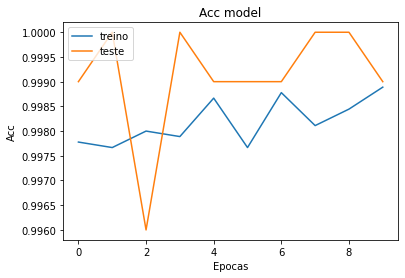

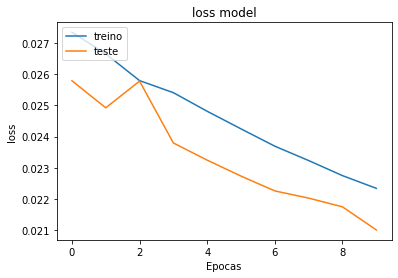

In [17]:
# Acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acc model')
plt.ylabel('Acc')
plt.xlabel('Epocas')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('Epocas')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()